# Demo Simulation Analysis

This is a demo of the simulator.

For reference: [iPython Notebook markdown](https://daringfireball.net/projects/markdown/syntax).

In [1]:
%matplotlib inline
from simulator import analysis_helper as ah
# read the simulation data
sim_names = ("base", "basegc", "wpgc", "wpnegc")
data = ah.load_data(sim_names, "../RESULTS/demo/")

## Host write vs disk write
text

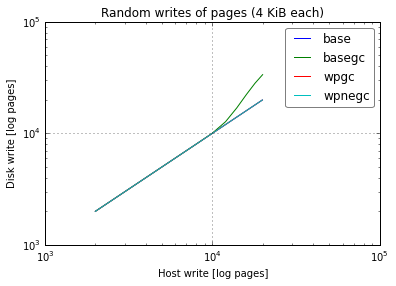

In [2]:
# plot host write vs disk write
ah.plot_disk_writes(sim_names, data)

## Title
text

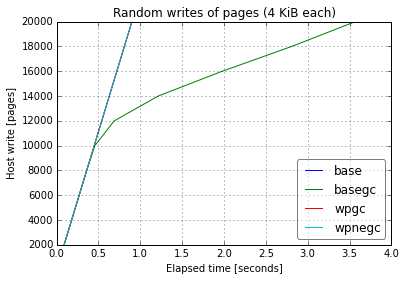

In [3]:
# plot host write time
ah.plot_disk_write_time(sim_names, data)

## Title
text

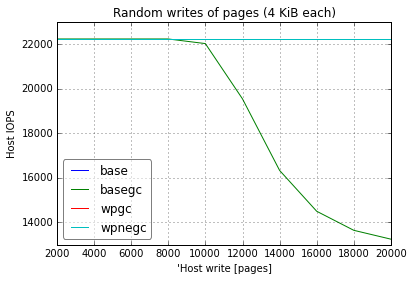

In [4]:
# plot the IOPS
ah.plot_iops(sim_names, data)

## Title
text

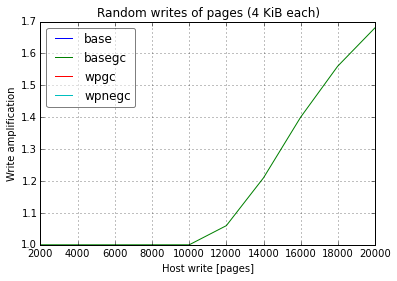

In [5]:
# plot the Amplification factor
ah.plot_disk_af(sim_names, data)

## Title
text

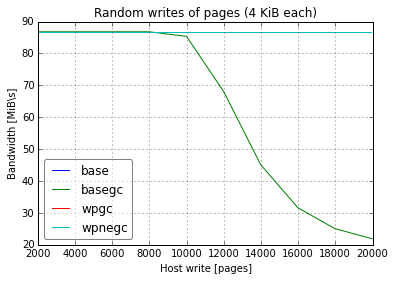

In [6]:
# plot the bandwidth
ah.plot_bandwidth(sim_names, data)

## Title
text

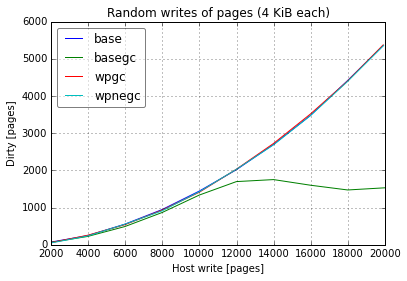

In [7]:
# plot the dirty pages
ah.plot_dirty_pages(sim_names, data)

## Title
text

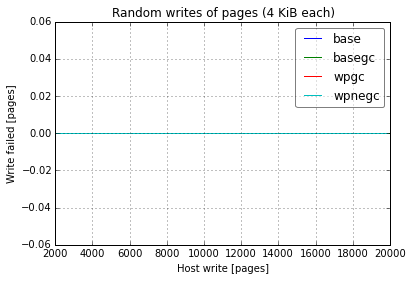

In [8]:
# plot the failures
ah.plot_write_faiures(sim_names, data)

## Conclusions

Use this area for final remarks about the analysis.